# About Dataset

**Context**

* The UK government amassed traffic data from 2000 and 2016, recording over 1.6 million accidents in the process and making this one of the most comprehensive traffic data sets out there.

  https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales

* This dataset is used to seek answers to questions such as:

    - How does changes in traffic flow affect accidents?
    - What increases accident rates?
    - Can we predict accident rates over time?
    - How do rural and urban areas differ?
      

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('data/accidents_2005_to_2007.csv', low_memory=False)
df2 = pd.read_csv('data/accidents_2009_to_2011.csv', low_memory=False)
df3 = pd.read_csv('data/accidents_2012_to_2014.csv', low_memory=False)
accidents = pd.concat([df1, df2, df3], axis = 0)

In [3]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [4]:
accidents.shape

(1504150, 33)

In [5]:
accidents.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [6]:
accidents.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [7]:
accidents = accidents.loc[:,["Accident_Severity","Number_of_Casualties","Day_of_Week","Date","Time","Local_Authority_(District)"
                         ,"Local_Authority_(Highway)","Road_Type","Speed_limit","Light_Conditions","Weather_Conditions",
                        "Road_Surface_Conditions","Urban_or_Rural_Area","Year"]]

In [8]:
accidents.tail(10)

,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
464687,3,1,2,24/11/2014,06:50,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Wet/Damp,2,2014
464688,1,3,3,25/11/2014,15:30,917,S12000006,Single carriageway,60,Daylight: Street light present,Fine without high winds,Wet/Damp,2,2014
464689,3,1,4,03/12/2014,19:30,917,S12000006,Single carriageway,60,Darkeness: No street lighting,Fog or mist,Wet/Damp,2,2014
464690,3,1,7,06/12/2014,03:00,917,S12000006,Single carriageway,40,Darkeness: No street lighting,Other,Wet/Damp,2,2014
464691,3,1,2,08/12/2014,09:16,917,S12000006,Dual carriageway,70,Daylight: Street light present,Fine without high winds,Snow,2,2014
464692,2,1,1,07/12/2014,22:20,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Snowing without high winds,Snow,2,2014
464693,3,2,5,11/12/2014,06:40,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Snow,2,2014
464694,3,1,3,09/12/2014,02:00,917,S12000006,Single carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,2014
464695,2,2,4,17/12/2014,06:55,917,S12000006,Single carriageway,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,2014
464696,3,2,4,24/12/2014,15:00,917,S12000006,Single carriageway,60,Daylight: Street light present,Fine without high winds,Wet/Damp,2,2014


In [9]:
accidents.isnull().sum()

Accident_Severity                0
Number_of_Casualties             0
Day_of_Week                      0
Date                             0
Time                           117
Local_Authority_(District)       0
Local_Authority_(Highway)        0
Road_Type                        0
Speed_limit                      0
Light_Conditions                 0
Weather_Conditions             126
Road_Surface_Conditions       1958
Urban_or_Rural_Area              0
Year                             0
dtype: int64

In [10]:
accidents.shape

(1504150, 14)

In [11]:
accidents = accidents.dropna()

In [12]:
accidents.shape

(1501957, 14)

In [13]:
accidents.isnull().sum()

Accident_Severity             0
Number_of_Casualties          0
Day_of_Week                   0
Date                          0
Time                          0
Local_Authority_(District)    0
Local_Authority_(Highway)     0
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [14]:
accidents.dtypes

Accident_Severity              int64
Number_of_Casualties           int64
Day_of_Week                    int64
Date                          object
Time                          object
Local_Authority_(District)     int64
Local_Authority_(Highway)     object
Road_Type                     object
Speed_limit                    int64
Light_Conditions              object
Weather_Conditions            object
Road_Surface_Conditions       object
Urban_or_Rural_Area            int64
Year                           int64
dtype: object

#      Number of Accidents by Years and Weekdays

In [15]:
year = accidents["Year"].value_counts()

In [16]:
year

Year
2005    198474
2006    188913
2007    181881
2012    179436
2009    163334
2010    154185
2011    151241
2014    146100
2013    138393
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Number of Accidents by Years')

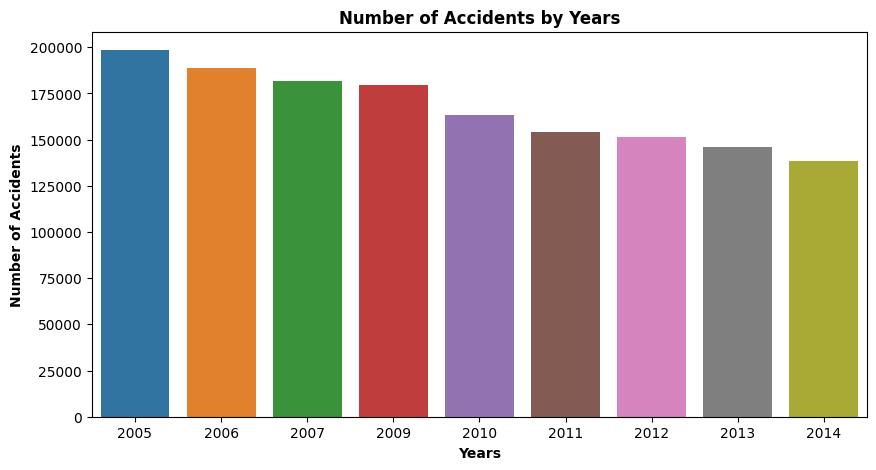

In [17]:
year = accidents["Year"].value_counts()

years = accidents["Year"].unique()
num = year.values

plt.figure(figsize = (10, 5))

sns.barplot(x = years, y = num)
plt.ylabel("Number of Accidents", weight = "bold")
plt.xlabel("Years", weight = "bold")

plt.title("Number of Accidents by Years", weight= "bold")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Number of Accidents by Weekdays')

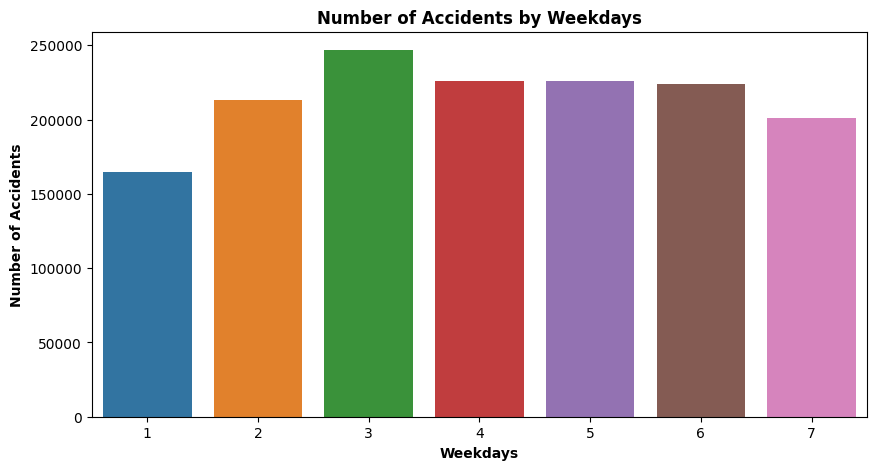

In [18]:
week = accidents["Day_of_Week"].value_counts()
weeks = accidents["Day_of_Week"].unique()
num_w = week.values

plt.figure(figsize=(10, 5))

sns.barplot(x = weeks, y = num_w)
plt.ylabel("Number of Accidents", weight = "bold")
plt.xlabel("Weekdays", weight = "bold")

plt.title("Number of Accidents by Weekdays", weight= "bold")

# How Does Weather Affect the Roads?

In [19]:
accidents["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

In [20]:
accidents['Road_Surface_Conditions'].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)'], dtype=object)

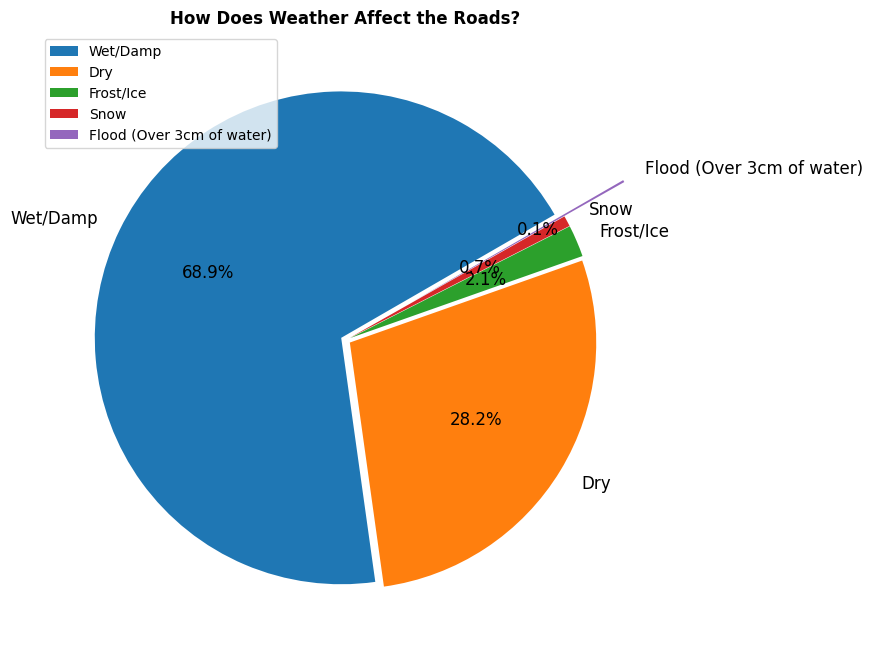

In [21]:
road_cond = accidents["Road_Surface_Conditions"].value_counts()
road_cond_arr = accidents["Road_Surface_Conditions"].unique()
road_acc_num_arr = road_cond.values

plt.figure(figsize = (20, 8))

plt.pie(road_acc_num_arr, labels = road_cond_arr,colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.02,0.02,0.02,0.02,0.3),autopct="%1.1f%%")
plt.title("How Does Weather Affect the Roads?",weight="bold")
plt.legend()

# Which Weather Condition Causes the Most Accidents?

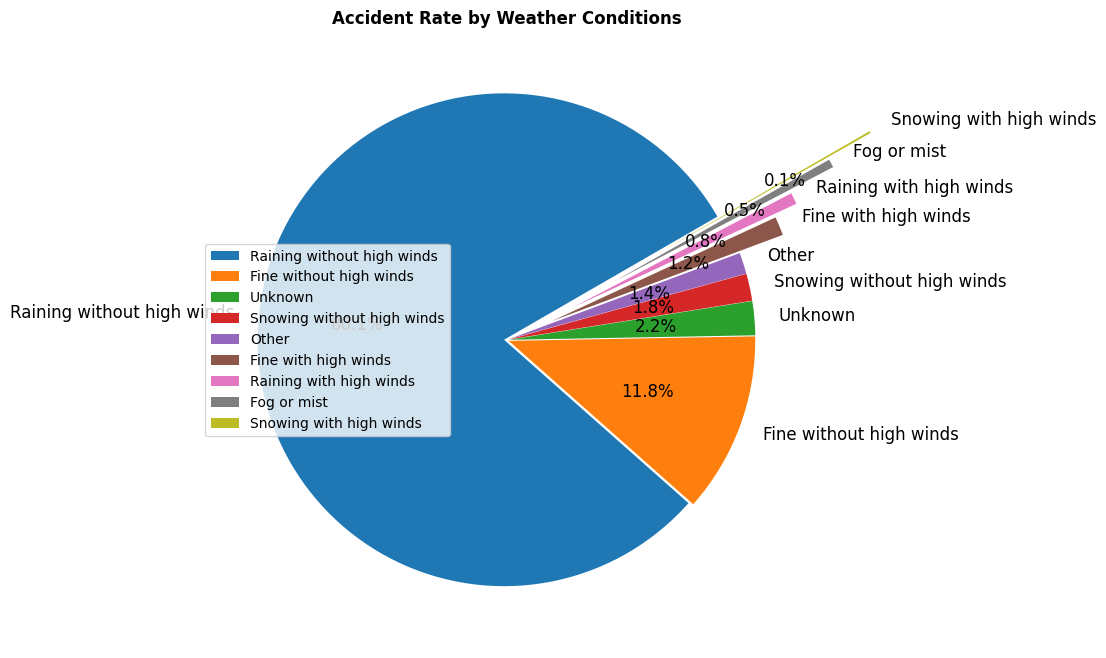

In [22]:
weather_cond = accidents["Weather_Conditions"].value_counts()
weather_cond_arr = accidents["Weather_Conditions"].unique()
weather_acc_num_arr = weather_cond.values

plt.figure(figsize = (20, 8))

plt.pie(weather_acc_num_arr, labels = weather_cond_arr,colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.01,0.01,0.20,0.3,0.50,0.7),autopct="%1.1f%%")
plt.title("Accident Rate by Weather Conditions",weight="bold")
plt.legend()

# Differences in Accident Risks in Rural and Urban Areas

In [23]:
accidents["Urban_or_Rural_Area"].value_counts()

Urban_or_Rural_Area
1    970642
2    531184
3       131
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Urban Area(1) vs Rural Area(2)')

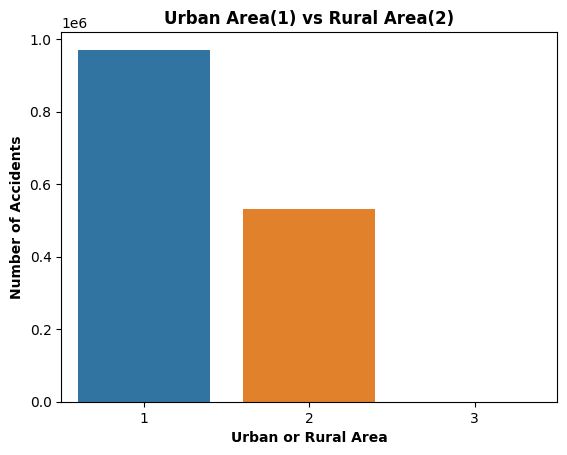

In [24]:
accidents["Urban_or_Rural_Area"].value_counts()

sns.countplot(x = "Urban_or_Rural_Area", data = accidents)
plt.xlabel("Urban or Rural Area", weight="bold")
plt.ylabel("Number of Accidents", weight="bold")
plt.title("Urban Area(1) vs Rural Area(2)", weight="bold")



# Accidents by Road Type and Light Conditions

In [25]:
accidents["Light_Conditions"].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [26]:
accidents["Road_Type"].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

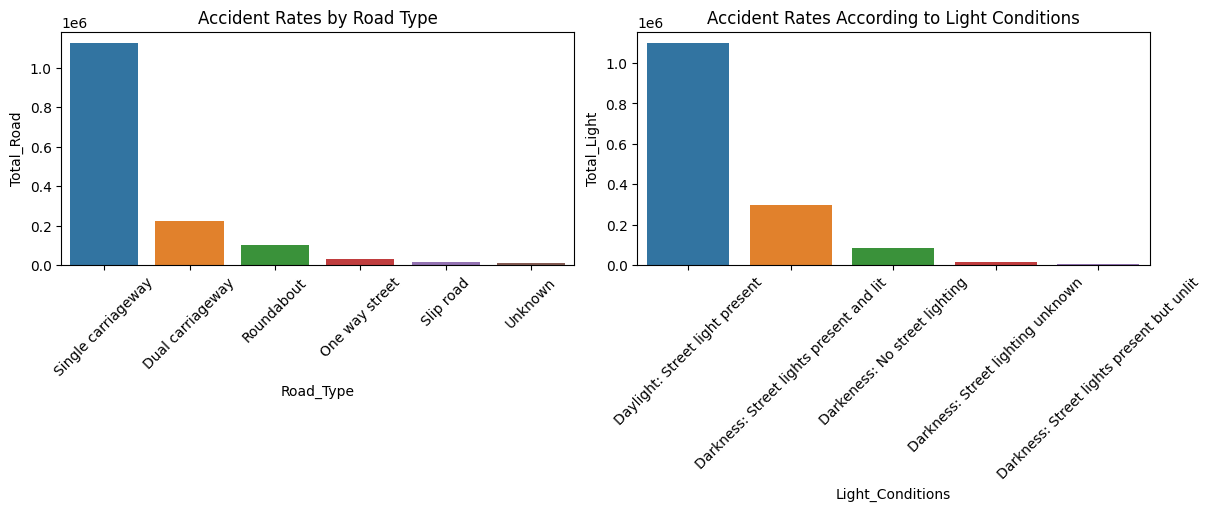

In [27]:
f, axs = plt.subplots(1,2, figsize = (12, 5), constrained_layout = True)
road_num = accidents.groupby("Road_Type")
total_road = pd.DataFrame(road_num.size().sort_values(ascending = False), columns = ["Total_Road"])
light_num = accidents.groupby("Light_Conditions")
total_light = pd.DataFrame(light_num.size().sort_values(ascending=False), columns = ["Total_Light"])

ax = sns.barplot(x = total_road.index, y = total_road["Total_Road"], data = total_road, ax = axs[0])
ax.tick_params(axis = 'x', rotation = 45)
ax = sns.barplot(x = total_light.index, y = total_light["Total_Light"], data = total_light, ax = axs[1])
ax.tick_params(axis = 'x', rotation = 45)

axs[0].title.set_text('Accident Rates by Road Type')
axs[1].title.set_text('Accident Rates According to Light Conditions')


# The Relationship Between Accident Severity and Number of Casualties

In [28]:
accidents["Number_of_Casualties"].unique()

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 21, 35, 22, 26, 45, 41, 36, 40, 25, 28, 42, 68,
       27, 48, 24, 43, 87, 63, 51, 33, 38, 46, 70, 93, 54])

In [29]:
accidents["Accident_Severity"].unique()

array([2, 3, 1])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(0, 0.5, 'Number_of_Casualties')

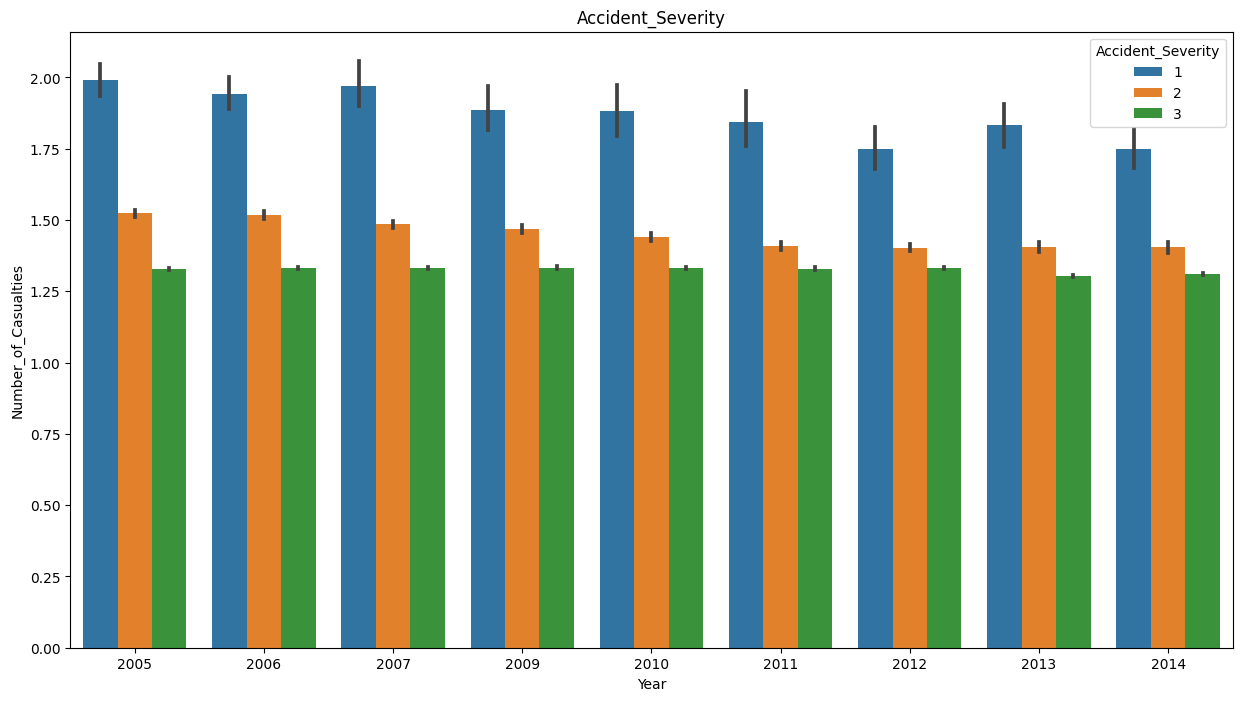

In [30]:
plt.figure(figsize = (15,8))
sns.barplot(x = "Year", y = "Number_of_Casualties", data = accidents, hue = "Accident_Severity")

plt.title("Accident_Severity")
plt.ylabel("Number_of_Casualties")


![separator2](https://i.imgur.com/4gX5WFr.png)

# Creating a Model

In [31]:
accidents.head()

,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,3,04/01/2005,17:42,12,E09000020,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,4,05/01/2005,17:36,12,E09000020,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,1,5,06/01/2005,00:15,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,6,07/01/2005,10:35,12,E09000020,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,2,10/01/2005,21:13,12,E09000020,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005


In [32]:
accidents["Road_Type"].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [33]:
accidents["Road_Type"]=[ 1 if each == "Single carriageway" else 2
                        if each == "Dual carriageway" else 3
                        if each == "One way street" else 4
                        if each == "Roundabout" else 5 
                        if each == "Slip road" else 6
                        for each in accidents ["Road_Type"]]

In [34]:
accidents["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

In [35]:
accidents["Weather_Conditions"]=[1 if each == "Raining without high winds" else 2
                          if each == "Fine without high winds" else 3
                          if each == "Unknown" else 4
                          if each == "Snowing without high winds" else 5
                          if each == "Other" else 6
                          if each == "Fine with high winds" else 7
                          if each == "Raining with high winds" else 8
                          if each == "Fog or mist" else 9
                          for each in accidents["Weather_Conditions"]]

In [36]:
accidents["Road_Surface_Conditions"].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)'], dtype=object)

In [37]:
accidents["Road_Surface_Conditions"]=[1 if each == "Wet/Damp" else 2
                                      if each == "Dry" else 3
                                      if each == "Frost/Ice" else 4
                                      if each == "Snow" else 5
                                      for each in accidents["Road_Surface_Conditions"]]

In [38]:
accidents["Light_Conditions"].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [39]:
accidents["Light_Conditions"]=[1 if each == "Daylight: Street light present" else 2
                          if each == "Darkness: Street lights present and lit" else 3
                          if each == "Darkness: Street lighting unknown" else 4
                          if each == "Darkness: Street lights present but unlit" else 5  
                          if each == "Darkeness: No street lighting" else 6
                          for each in accidents["Light_Conditions"]]

In [40]:
accidents.drop(["Time"], axis = 1, inplace= True)
y = accidents["Accident_Severity"].values

In [41]:
accidents.head()

,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,3,04/01/2005,12,E09000020,1,30,1,1,1,1,2005
1,3,1,4,05/01/2005,12,E09000020,2,30,2,2,2,1,2005
2,3,1,5,06/01/2005,12,E09000020,1,30,2,2,2,1,2005
3,3,1,6,07/01/2005,12,E09000020,1,30,1,2,2,1,2005
4,3,1,2,10/01/2005,12,E09000020,1,30,3,2,1,1,2005


In [42]:
accidents.drop(["Date"], axis = 1, inplace= True)
accidents.drop(["Local_Authority_(District)"], axis = 1, inplace= True)
accidents.drop(["Local_Authority_(Highway)"], axis = 1, inplace= True)
accidents.drop(["Speed_limit"], axis = 1, inplace= True)


In [43]:
accidents.head()

,Accident_Severity,Number_of_Casualties,Day_of_Week,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,3,1,1,1,1,1,2005
1,3,1,4,2,2,2,2,1,2005
2,3,1,5,1,2,2,2,1,2005
3,3,1,6,1,1,2,2,1,2005
4,3,1,2,1,3,2,1,1,2005


In [44]:
X = accidents.drop(["Accident_Severity"],axis=1).values
y = accidents["Accident_Severity"].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1201565, 8), (300392, 8), (1201565,), (300392,))

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
import time 
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()

# training
regressor = RandomForestRegressor(n_estimators=100, max_features=0.5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

end_time = time.time()
print(f"Run time: {end_time - start_time}")

Run time: 62.26184797286987


In [49]:
from sklearn import metrics

print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score:  0.07630719186969659
Testing score:   0.0009651406873629753
Root Mean Squared Error: 0.40177199375716616
